# **Exploratory Data Analysis**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Loading the data

In [2]:
df = pd.read_csv('../data/raw/insurance.csv')

In [3]:
df.shape

(1338, 7)

### **Data Cleaning**

Checking for null values

In [4]:
df.isnull().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

Checking for duplicate rows

In [5]:
df.duplicated().sum()

np.int64(1)

In [6]:
df.drop_duplicates(inplace=True)

In [7]:
df.shape

(1337, 7)

Checking the datatypes of each row

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1337 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1337 non-null   int64  
 1   sex       1337 non-null   object 
 2   bmi       1337 non-null   float64
 3   children  1337 non-null   int64  
 4   smoker    1337 non-null   object 
 5   region    1337 non-null   object 
 6   charges   1337 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 83.6+ KB


### **Univariate Analysis**

In [9]:
df.describe()

,age,bmi,children,charges
count,1337.000000,1337.000000,1337.000000,1337.000000
mean,39.222139,30.663452,1.095737,13279.121487
std,14.044333,6.100468,1.205571,12110.359656
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.290000,0.000000,4746.344000
50%,39.000000,30.400000,1.000000,9386.161300
75%,51.000000,34.700000,2.000000,16657.717450
max,64.000000,53.130000,5.000000,63770.428010


- The 75% of the data is **under age 51**.
- The average charges paid by a customer for **insurance is $13279**.
- The maximum amount paid by any customer for **insurance is $63770**.
- The 75% of the people have **bmi under 34**.


#### Creating Age Groups and BMI Category

The age category is as follows:
- 0-18
- 19-36
- 37-54
- 55+

In [127]:
# creating age groups
labels = ['0-18','19-36', '37-54','55-64'] 
bins = [0,18,36,54,64]

df['age_group'] = pd.cut(x=df['age'],bins=bins, labels=labels)

df.head()


,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,19-36,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0-18,Obese I
2,28,male,33.000,3,no,southeast,4449.46200,19-36,Obese I
3,33,male,22.705,0,no,northwest,21984.47061,19-36,Normal
4,32,male,28.880,0,no,northwest,3866.85520,19-36,Overweight


In [128]:
df[df['age_group'] == '55+']

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category


In [129]:
# creating bmi category 
bmi_bins = [0, 18.5, 24.9, 29.9, 34.9, 39.9, float('inf')]
bmi_labels = ['Underweight', 'Normal', 'Overweight', 'Obese I', 'Obese II', 'Obese III']

df['bmi_category'] = pd.cut(x=df['bmi'],bins=bmi_bins, labels=bmi_labels)

df.head()

,age,sex,bmi,children,smoker,region,charges,age_group,bmi_category
0,19,female,27.900,0,yes,southwest,16884.92400,19-36,Overweight
1,18,male,33.770,1,no,southeast,1725.55230,0-18,Obese I
2,28,male,33.000,3,no,southeast,4449.46200,19-36,Obese I
3,33,male,22.705,0,no,northwest,21984.47061,19-36,Normal
4,32,male,28.880,0,no,northwest,3866.85520,19-36,Overweight


Checking the distribution of the bmi data usinh histogram.

<Axes: xlabel='bmi', ylabel='Count'>

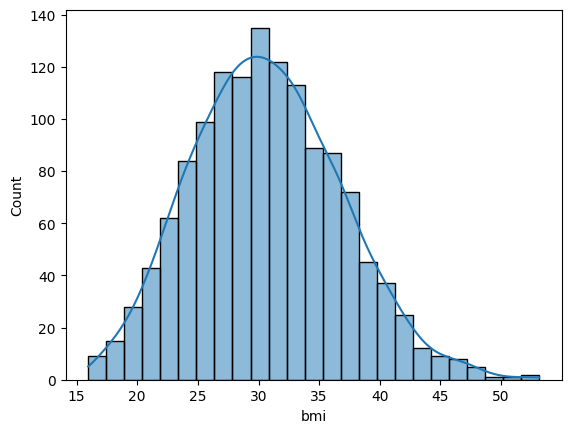

In [131]:
sns.histplot(df['bmi'], kde=True)

The data looks distributed normally and there are very less outliers.

Checking different distrubutions for different features.

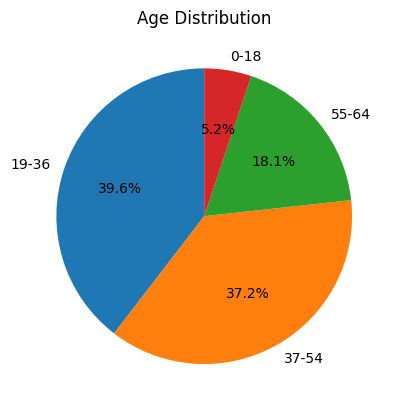

In [147]:
age_counts = df['age_group'].value_counts()
plt.pie(age_counts, labels=age_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Age Distribution')
plt.show()

The majority of insurance purchases are made by individuals **aged 19–36 and 37–54**, accounting **for 39.6% and 37.2%** of the total policyholders, respectively.

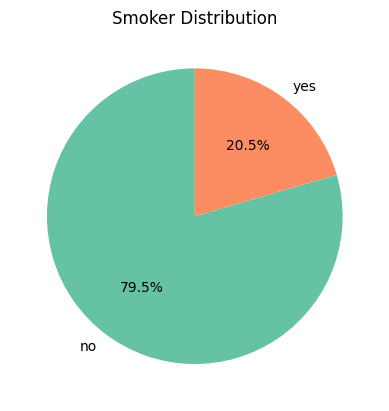

In [132]:
smoker_counts = df['smoker'].value_counts()
plt.pie(smoker_counts, labels=smoker_counts.index, autopct='%1.1f%%', colors=['#66c2a5', '#fc8d62'], startangle=90)
plt.title('Smoker Distribution')
plt.show()

A significant majority of insurance holders **are non-smokers**, accounting for **79.5%** of the total.

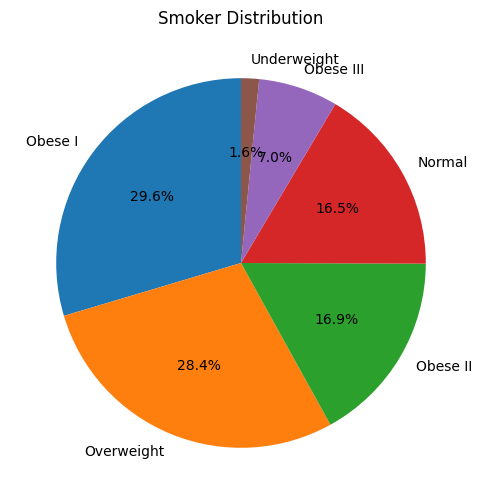

In [133]:
bmi_counts= df['bmi_category'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(bmi_counts, labels=bmi_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Smoker Distribution')
plt.show()

The majority of insurance holders fall into the 'Obese I' and 'Overweight' BMI categories, while **only 16.5%** maintain a **normal BMI**. Additionally, underweight individuals represent a very small portion of the population, accounting for just 1.6%.

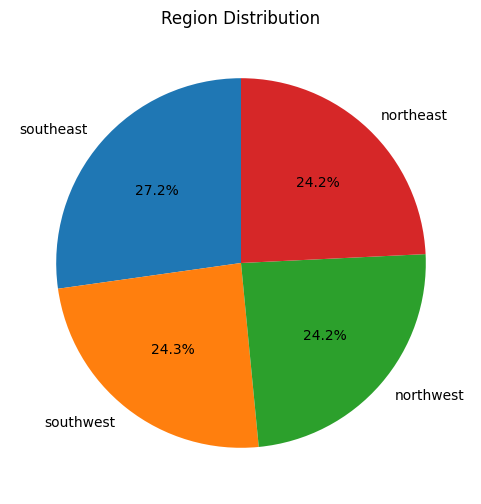

In [134]:
region_counts= df['region'].value_counts()
plt.figure(figsize=(6, 6))
plt.pie(region_counts, labels=region_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Region Distribution')
plt.show()

Insurance purchases are distributed fairly evenly across all regions, with no significant dominance by any particular region.

### **Bivariate Analysis**

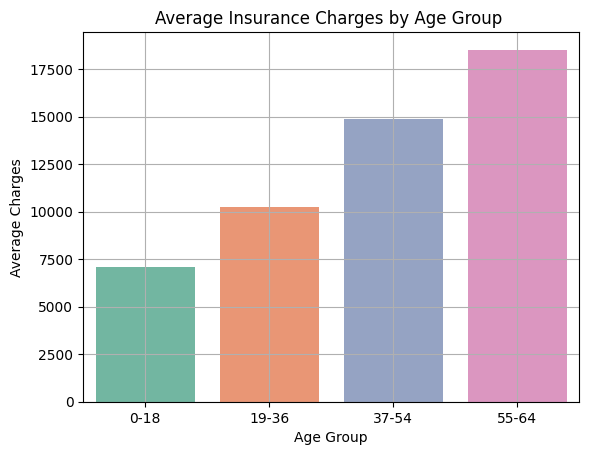

In [135]:
sns.barplot(data=df, x='age_group', y = 'charges', ci=None,palette='Set2')
plt.title('Average Insurance Charges by Age Group ')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

A clear upward trend is observed in insurance charges **with increasing age**. Younger individuals, especially those below 30, incur **relatively lower costs**, while older individuals **face higher premiums**, likely due to increased health-related risks and expected medical expenses.

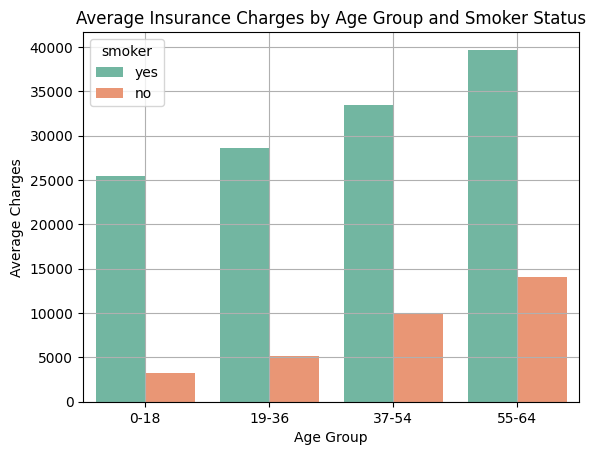

In [136]:
sns.barplot(data=df, x='age_group', y = 'charges', ci=None, hue='smoker',palette='Set2')
plt.title('Average Insurance Charges by Age Group and Smoker Status')
plt.xlabel('Age Group')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

Smokers consistently incur higher insurance charges compared to non-smokers, with this pattern evident across all age groups.  
Insurance charges increase with age and are significantly higher for individuals who smoke, indicating that both age and smoking status are key factors influencing insurance costs.

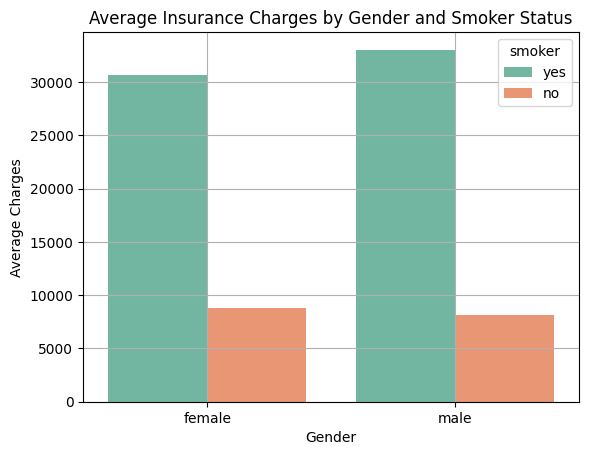

In [137]:
sns.barplot(data=df, x='sex', y = 'charges', ci=None, hue='smoker',palette='Set2')
plt.title('Average Insurance Charges by Gender and Smoker Status')
plt.xlabel('Gender')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()

Among smokers, males incur higher insurance charges than females, suggesting that gender may play a role in premium calculation alongside smoking status.

In [152]:
group_totals = df.groupby('age_group')['smoker'].value_counts(normalize=True).mul(100)
group_totals

age_group  smoker
0-18       no        82.608696
           yes       17.391304
19-36      no        78.260870
           yes       21.739130
37-54      no        78.873239
           yes       21.126761
55-64      no        82.644628
           yes       17.355372
Name: proportion, dtype: float64

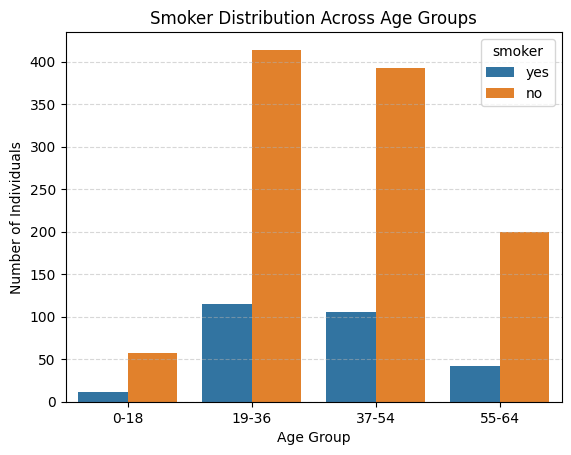

In [138]:
sns.countplot(data=df, x='age_group', hue='smoker')
plt.title('Smoker Distribution Across Age Groups')
plt.xlabel('Age Group')
plt.ylabel('Number of Individuals')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.show()

The **highest proportion of smokers** within an age group is observed in the **19–36 and 37–54**age groups, with approximately **78%** of individuals in these groups being smokers. In contrast, only **about 17% of individuals** in the **0–18 age group are smokers**.

In [158]:
bmi_counts = df.groupby(['age_group', 'bmi_category']).size().unstack()
bmi_counts

bmi_category,Underweight,Normal,Overweight,Obese I,Obese II,Obese III
age_group,,,,,,
0-18,2,11,14,21,14,7
19-36,12,103,158,154,74,28
37-54,5,81,143,146,82,40
55-64,2,26,65,75,56,18


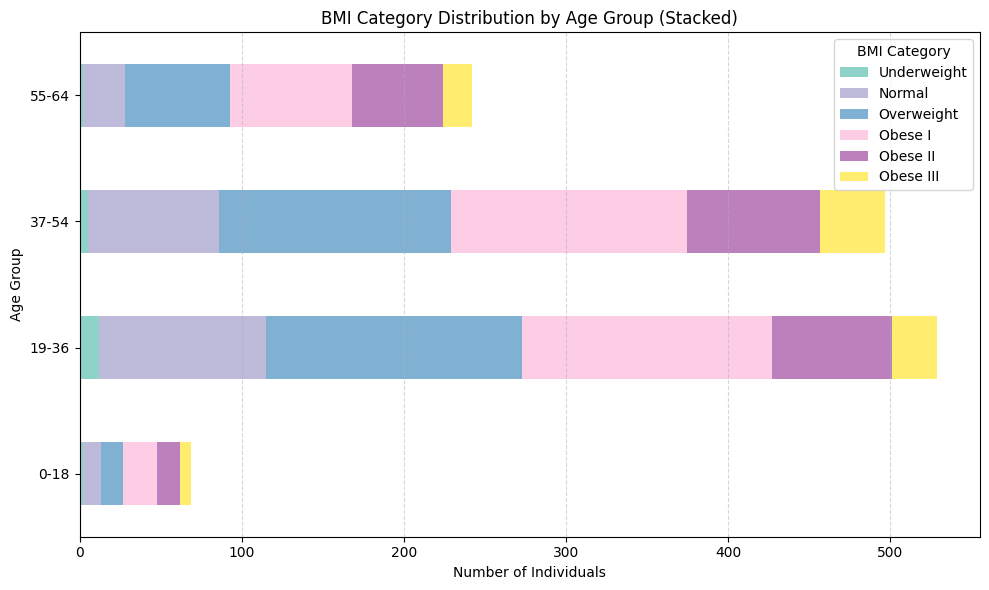

In [159]:
bmi_counts.plot(kind='barh', stacked=True, figsize=(10,6), colormap='Set3')

plt.title("BMI Category Distribution by Age Group (Stacked)")
plt.xlabel("Number of Individuals")   # X-axis = number of individuals (horizontal bar)
plt.ylabel("Age Group")              # Y-axis = age groups
plt.legend(title='BMI Category')
plt.grid(axis='x', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()


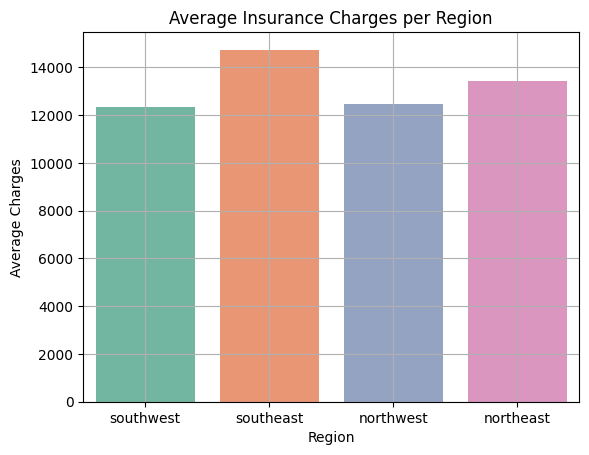

In [141]:
sns.barplot(data=df, x='region', y='charges', estimator='mean', ci=None, palette='Set2')
plt.title('Average Insurance Charges per Region')
plt.xlabel('Region')
plt.ylabel('Average Charges')
plt.grid(True)
plt.show()


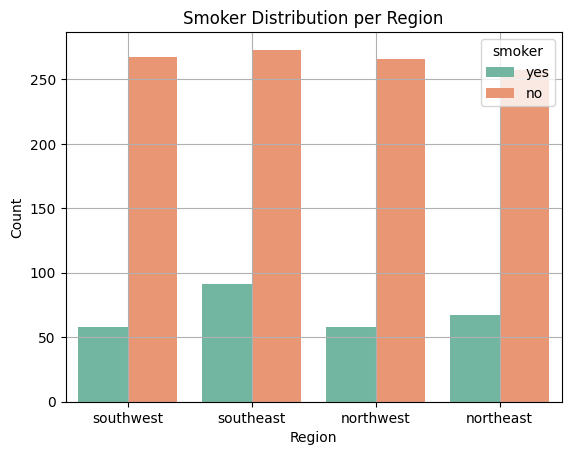

In [160]:
sns.countplot(data=df, x='region', hue='smoker', palette='Set2')
plt.title('Smoker Distribution per Region')
plt.xlabel('Region')
plt.ylabel('Count')
plt.grid(True)
plt.show()

The higehst number of smokers are from the southeast region. and lowest from the region southwest and northwest.

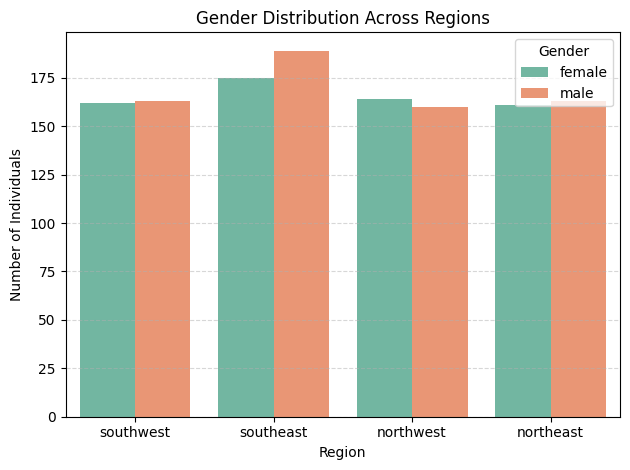

In [143]:
sns.countplot(data=df, x='region', hue='sex', palette='Set2')

plt.title('Gender Distribution Across Regions')
plt.xlabel('Region')
plt.ylabel('Number of Individuals')
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.legend(title='Gender')
plt.tight_layout()
plt.show()

Gender distribution is approximately equal across all regions, indicating no significant regional gender imbalance among insurance holders.

<Axes: >

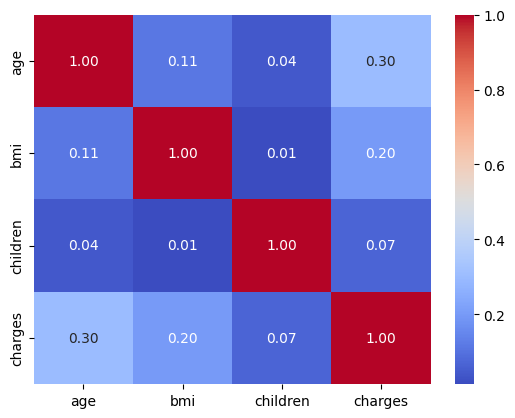

In [161]:
sns.heatmap(data=df.corr(numeric_only=True),annot=True, fmt=".2f",          
    cmap="coolwarm")

Age shows a strong positive correlation with insurance charges, while the number of children has the weakest correlation with charges.

In [145]:
df.to_csv('../data/cleaned/final.csv', index=False)